In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/dataset.csv'
df = pd.read_csv(file_path)

In [5]:
df.head()

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00


In [6]:
df.describe()

,ID,Capacity,Latitude,Longitude,Occupancy,QueueLength,IsSpecialDay
count,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000
mean,9183.500000,1605.214286,25.706547,90.751170,731.084059,4.587925,0.150915
std,5302.529208,1131.153886,1.582749,3.536636,621.164982,2.580062,0.357975
min,0.000000,387.000000,20.000035,78.000003,2.000000,0.000000,0.000000
25%,4591.750000,577.000000,26.140048,91.727995,322.000000,2.000000,0.000000
50%,9183.500000,1261.000000,26.147482,91.729511,568.000000,4.000000,0.000000
75%,13775.250000,2803.000000,26.147541,91.736172,976.000000,6.000000,0.000000
max,18367.000000,3883.000000,26.150504,91.740994,3499.000000,15.000000,1.000000


In [7]:
df.shape

(18368, 12)

In [8]:
df.isna().sum()

,0
ID,0
SystemCodeNumber,0
Capacity,0
Latitude,0
Longitude,0
Occupancy,0
VehicleType,0
TrafficConditionNearby,0
QueueLength,0
IsSpecialDay,0


In [9]:
df['VehicleType'].describe()

,VehicleType
count,18368
unique,4
top,car
freq,11166


In [10]:
df['VehicleType'].unique()

array(['car', 'bike', 'truck', 'cycle'], dtype=object)

In [11]:
df_random = df.sample(frac=1, random_state=42).reset_index(drop=True)
train_size=int(0.8* len(df_random))
train=df_random[:train_size]
test=df_random[train_size:]

In [12]:
train

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,5199,BHMMBMMBX01,687,20.000035,78.000003,335,car,average,4,0,17-12-2016,10:33:00
1,3997,BHMMBMMBX01,687,20.000035,78.000003,643,truck,average,5,0,07-10-2016,11:30:00
2,7841,BHMNCPNST01,485,26.140048,91.730972,180,bike,average,5,1,18-12-2016,10:30:00
3,13821,Others-CCCPS202,2937,26.147491,91.727997,596,car,low,4,1,13-11-2016,16:27:00
4,2995,BHMEURBRD01,470,26.149020,91.739503,458,car,high,7,0,26-10-2016,13:26:00
...,...,...,...,...,...,...,...,...,...,...,...,...
14689,10993,Others-CCCPS119a,2803,26.147541,91.727970,537,car,high,7,0,02-11-2016,13:30:00
14690,11863,Others-CCCPS135a,3883,26.147499,91.728005,1409,bike,low,3,0,07-10-2016,08:30:00
14691,3667,BHMEURBRD01,470,26.149020,91.739503,329,cycle,low,2,0,02-12-2016,16:32:00
14692,12474,Others-CCCPS135a,3883,26.147499,91.728005,547,car,low,2,0,12-11-2016,08:00:00


In [13]:
test

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
14694,7594,BHMNCPNST01,485,26.140048,91.730972,232,car,average,5,0,02-12-2016,11:55:00
14695,6976,BHMNCPNST01,485,26.140048,91.730972,283,car,low,2,0,29-10-2016,08:59:00
14696,17629,Shopping,1920,26.150504,91.733531,462,car,low,3,1,06-11-2016,15:26:00
14697,12782,Others-CCCPS135a,3883,26.147499,91.728005,2108,bike,low,3,0,29-11-2016,09:02:00
14698,10211,Others-CCCPS105a,2009,26.147473,91.728049,894,car,average,3,0,02-12-2016,08:28:00
...,...,...,...,...,...,...,...,...,...,...,...,...
18363,11284,Others-CCCPS119a,2803,26.147541,91.727970,605,car,low,2,0,18-11-2016,15:01:00
18364,11964,Others-CCCPS135a,3883,26.147499,91.728005,3084,bike,average,5,0,12-10-2016,14:03:00
18365,5390,BHMNCPHST01,1200,26.140014,91.731000,641,car,low,2,0,11-10-2016,16:01:00
18366,860,BHMBCCMKT01,577,26.144536,91.736172,175,car,average,3,0,22-11-2016,14:57:00


In [14]:
prices=[]
current=10;
alpha=1.5
for index,row in train.iterrows():
    occ=row['Occupancy']
    cap=row['Capacity']
    price=current+alpha*(occ/cap)
    prices.append(price)
    current=price

Text(0, 0.5, 'Price')

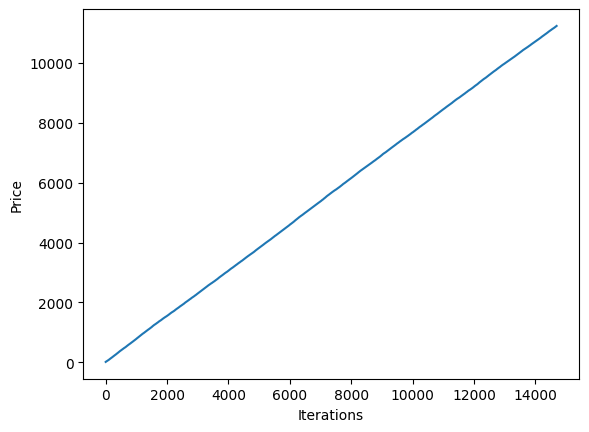

In [15]:
import matplotlib.pyplot as plt
plt.plot(prices)
plt.xlabel("Iterations")
plt.ylabel("Price")

In [16]:
mean=sum(prices)/len(prices)
print(mean)

5640.022001837306


In [17]:
prices2=[]
current=10;
alpha=0.0014
for index,row in train.iterrows():
    occ=row['Occupancy']
    cap=row['Capacity']
    price=current+alpha*(occ/cap)
    prices2.append(price)
    current=price

Text(0, 0.5, 'Price')

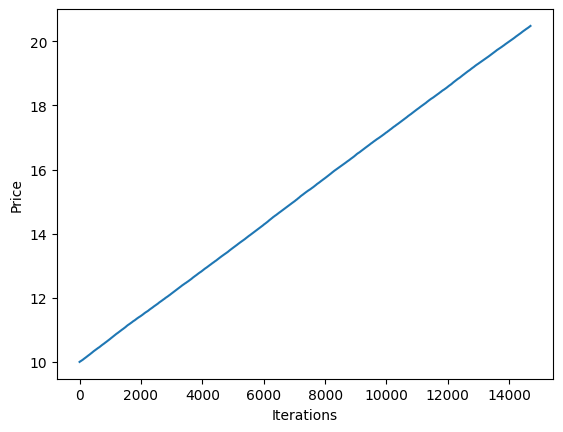

In [18]:
import matplotlib.pyplot as plt
plt.plot(prices2)
plt.xlabel("Iterations")
plt.ylabel("Price")

In [19]:
max(prices2)

20.477472310671732

In [20]:
max(prices)

11235.863190005424

In [21]:
def model1(currentprice,occupancy,capacity,alpha=0.001):
    return currentprice+alpha*(occupancy/capacity)

In [22]:
final=[]
current=10;
for index,row in test.iterrows():
    occ=row['Occupancy']
    cap=row['Capacity']
    price=model1(current,occ,cap)
    final.append(price)
    current=price

Text(0, 0.5, 'Price')

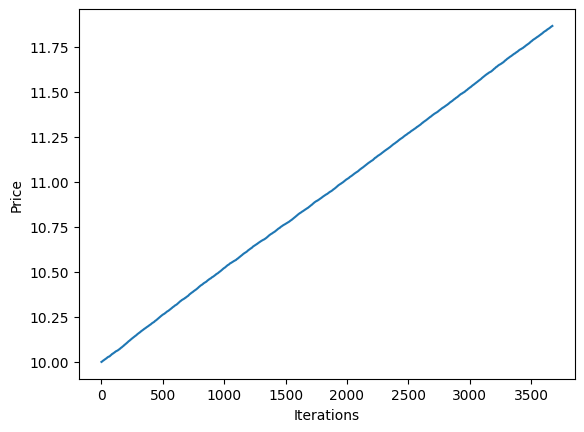

In [23]:
plt.plot(final)
plt.xlabel("Iterations")
plt.ylabel("Price")


In [24]:
#########################################################################################
#Model-2

In [25]:
df

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...
18363,18363,Shopping,1920,26.150504,91.733531,1517,truck,average,6,0,19-12-2016,14:30:00
18364,18364,Shopping,1920,26.150504,91.733531,1487,car,low,3,0,19-12-2016,15:03:00
18365,18365,Shopping,1920,26.150504,91.733531,1432,cycle,low,3,0,19-12-2016,15:29:00
18366,18366,Shopping,1920,26.150504,91.733531,1321,car,low,2,0,19-12-2016,16:03:00


In [26]:
data=df[['Capacity','Occupancy','VehicleType','TrafficConditionNearby','QueueLength','IsSpecialDay']]

In [27]:
data

,Capacity,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay
0,577,61,car,low,1,0
1,577,64,car,low,1,0
2,577,80,car,low,2,0
3,577,107,car,low,2,0
4,577,150,bike,low,2,0
...,...,...,...,...,...,...
18363,1920,1517,truck,average,6,0
18364,1920,1487,car,low,3,0
18365,1920,1432,cycle,low,3,0
18366,1920,1321,car,low,2,0


In [28]:
data['VehicleType'].unique()

array(['car', 'bike', 'truck', 'cycle'], dtype=object)

In [29]:
weights={'car':1.5,'bike':1,'cycle':0.5,'truck':2}
data['VehicleType'] = data['VehicleType'].map(weights)

/tmp/ipython-input-29-4051934112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['VehicleType'] = data['VehicleType'].map(weights)


In [30]:
data

,Capacity,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay
0,577,61,1.5,low,1,0
1,577,64,1.5,low,1,0
2,577,80,1.5,low,2,0
3,577,107,1.5,low,2,0
4,577,150,1.0,low,2,0
...,...,...,...,...,...,...
18363,1920,1517,2.0,average,6,0
18364,1920,1487,1.5,low,3,0
18365,1920,1432,0.5,low,3,0
18366,1920,1321,1.5,low,2,0


In [31]:
traffic={'low': 0,'average':0.5,'high':1}
data['TrafficConditionNearby']=data['TrafficConditionNearby'].map(traffic)

/tmp/ipython-input-31-2488838628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TrafficConditionNearby']=data['TrafficConditionNearby'].map(traffic)


In [32]:
data


,Capacity,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay
0,577,61,1.5,0.0,1,0
1,577,64,1.5,0.0,1,0
2,577,80,1.5,0.0,2,0
3,577,107,1.5,0.0,2,0
4,577,150,1.0,0.0,2,0
...,...,...,...,...,...,...
18363,1920,1517,2.0,0.5,6,0
18364,1920,1487,1.5,0.0,3,0
18365,1920,1432,0.5,0.0,3,0
18366,1920,1321,1.5,0.0,2,0


In [33]:
data['IsSpecialDay'].unique()

array([0, 1])

In [34]:
data['QueueLength'].unique()

array([ 1,  2,  3,  6,  5,  8,  7,  4,  9, 10,  0, 11, 12, 13, 14, 15])

In [35]:
data['OccupancyRate']=data['Occupancy']/data['Capacity']

/tmp/ipython-input-35-1811197386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['OccupancyRate']=data['Occupancy']/data['Capacity']


In [36]:
data

,Capacity,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,OccupancyRate
0,577,61,1.5,0.0,1,0,0.105719
1,577,64,1.5,0.0,1,0,0.110919
2,577,80,1.5,0.0,2,0,0.138648
3,577,107,1.5,0.0,2,0,0.185442
4,577,150,1.0,0.0,2,0,0.259965
...,...,...,...,...,...,...,...
18363,1920,1517,2.0,0.5,6,0,0.790104
18364,1920,1487,1.5,0.0,3,0,0.774479
18365,1920,1432,0.5,0.0,3,0,0.745833
18366,1920,1321,1.5,0.0,2,0,0.688021


In [37]:
data['QueueLength']=(data['QueueLength']-min(data['QueueLength']))/(max(data['QueueLength'])-min(data['QueueLength']))

/tmp/ipython-input-37-1802108222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['QueueLength']=(data['QueueLength']-min(data['QueueLength']))/(max(data['QueueLength'])-min(data['QueueLength']))


In [38]:
data

,Capacity,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,OccupancyRate
0,577,61,1.5,0.0,0.066667,0,0.105719
1,577,64,1.5,0.0,0.066667,0,0.110919
2,577,80,1.5,0.0,0.133333,0,0.138648
3,577,107,1.5,0.0,0.133333,0,0.185442
4,577,150,1.0,0.0,0.133333,0,0.259965
...,...,...,...,...,...,...,...
18363,1920,1517,2.0,0.5,0.400000,0,0.790104
18364,1920,1487,1.5,0.0,0.200000,0,0.774479
18365,1920,1432,0.5,0.0,0.200000,0,0.745833
18366,1920,1321,1.5,0.0,0.133333,0,0.688021


In [39]:
#Calculating demand on a scale of 1-10
demand=[]
demand= data['OccupancyRate'] + 2*data['VehicleType'] + data['IsSpecialDay']+2*data['QueueLength']+2*data['TrafficConditionNearby']


In [40]:
demand

,0
0,3.239053
1,3.244252
2,3.405315
3,3.452109
4,2.526632
...,...
18363,6.590104
18364,4.174479
18365,2.145833
18366,3.954687


In [41]:
#Normalized Demand:
normaldemand=[]
normaldemand=(demand-min(demand))/(max(demand)-min(demand))

In [42]:
#normalizing between -1 and 2:
normaldemand=normaldemand*(3)-1

In [43]:
#Calculating Price:
Lambda=0.5
price=[]
base=10
price=base*(1+Lambda*normaldemand)

In [44]:
price

,0
0,8.674769
1,8.683994
2,8.969775
3,9.052804
4,7.410689
...,...
18363,14.620689
18364,10.334538
18365,6.735021
18366,9.944552


Text(0, 0.5, 'Price')

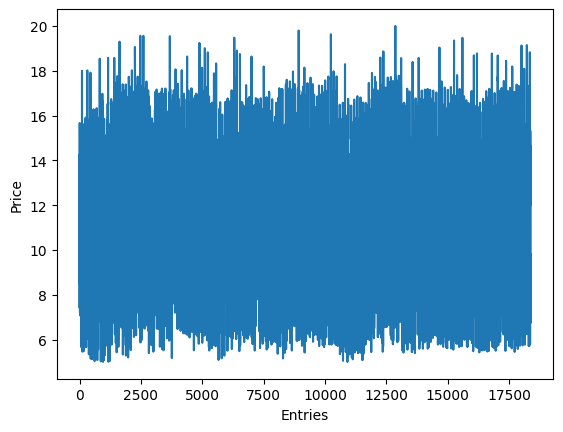

In [45]:
plt.plot(price)
plt.xlabel("Entries")
plt.ylabel("Price")

In [46]:
min(price)

5.0

In [47]:
max(price)

20.0

In [62]:
#####################################################################
#Pathway Part


In [48]:
!pip install pathway bokeh --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.6/777.6 kB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.4/318.4 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.8/985.8 kB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [49]:
import datetime
from datetime import datetime
import pathway as pw
import bokeh.plotting
import panel as pn

In [51]:
ds=pd.read_csv(file_path)

In [52]:
ds['Timestamp'] = pd.to_datetime(ds['LastUpdatedDate'] + ' ' + ds['LastUpdatedTime'],
                                  format='%d-%m-%Y %H:%M:%S')
ds = ds.sort_values('Timestamp').reset_index(drop=True)

In [53]:
ds[["Timestamp", "Occupancy", "Capacity"]].to_csv("parking_stream.csv", index=False)

In [54]:
class ParkingSchema(pw.Schema):
    Timestamp: str
    Occupancy: int
    Capacity: int

In [55]:
data = pw.demo.replay_csv("parking_stream.csv", schema=ParkingSchema, input_rate=1000)

In [57]:
fmt = "%Y-%m-%d %H:%M:%S"

data_with_time = data.with_columns(
    t = data.Timestamp.dt.strptime(fmt),
    day = data.Timestamp.dt.strptime(fmt).dt.strftime("%Y-%m-%dT00:00:00"))

In [69]:
import datetime

delta_window = (
    data_with_time.windowby(
        pw.this.t,
        instance=pw.this.day,
        window=pw.temporal.tumbling(datetime.timedelta(days=1)),
        behavior=pw.temporal.exactly_once_behavior()
    )
    .reduce(
        t=pw.this._pw_window_end,
        occ_max=pw.reducers.max(pw.this.Occupancy),
        occ_min=pw.reducers.min(pw.this.Occupancy),
        cap=pw.reducers.max(pw.this.Capacity),
    )
    .with_columns(
        price=10 + (pw.this.occ_max - pw.this.occ_min) / pw.this.cap
    )
)

In [60]:
pn.extension()

def price_plotter(source):
    fig = bokeh.plotting.figure(
        height=400,
        width=800,
        title="Pathway: Daily Parking Price",
        x_axis_type="datetime",
    )

    fig.line("t", "price", source=source, line_width=2, color="navy")


    fig.circle("t", "price", source=source, size=6, color="red")

    return fig
viz = delta_window.plot(price_plotter, sorting_col="t")

pn.Column(viz).servable()

Column
    [0] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)

In [61]:
pw.run()

Output()